In [18]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [19]:
#url = "https://www.aacsb.edu/accreditation/accredited-schools"
html_content="./input/AACSB.html"
#html_content = requests.get(url).text
soup = BeautifulSoup(open(html_content), "lxml")
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if IE 7]>         <html lang="en-us" class="html no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="html no-js lt-ie9">        <![endif]-->
<!--[if IE 9]>         <html lang="en-us" class="html no-js ie9">           <![endif]-->
<!--[if gt IE 9]><!-->
<html class="html no-js" lang="en-us" moznomarginboxes="">
 <!--<![endif]-->
 <head id="head">
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=edge" htt


In [20]:
my_div = soup.find("div",{"class":"modContent"})
print(my_div.prettify()[:500])

<div class="modContent">
 <table style="width: 100%;">
  <thead>
   <tr>
    <th>
    </th>
    <th id="content_0_center_1_lstSchools_businessHeader">
     Business
    </th>
    <th id="content_0_center_1_lstSchools_accountingHeader">
     Accounting
    </th>
   </tr>
  </thead>
  <tbody>
   <tr>
    <td>
     <p>
      <b>
       Aalto University
      </b>
      <span class="smaller">
       (Finland)
      </span>
      <br/>
      School of Business
      <br/>
      <a href="http://biz.aa


In [21]:
my_table = my_div.find("table")
print(my_table.prettify()[:500])

<table style="width: 100%;">
 <thead>
  <tr>
   <th>
   </th>
   <th id="content_0_center_1_lstSchools_businessHeader">
    Business
   </th>
   <th id="content_0_center_1_lstSchools_accountingHeader">
    Accounting
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <p>
     <b>
      Aalto University
     </b>
     <span class="smaller">
      (Finland)
     </span>
     <br/>
     School of Business
     <br/>
     <a href="http://biz.aalto.fi/en/" id="content_0_center_1_lstSchools_hypVie


In [22]:
my_rows = my_table.tbody.find_all("tr")
my_rows[:3]

[<tr>
 <td>
 <p>
 <b>
 									Aalto University
 								</b>
 <span class="smaller">(Finland)</span><br/>
 								School of Business
 								<br/>
 <a href="http://biz.aalto.fi/en/" id="content_0_center_1_lstSchools_hypViewSchool_0" target="_blank">Website</a>
 								|
 								<a href="https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&amp;unitid=55340&amp;userType=All" id="content_0_center_1_lstSchools_hypDataDirect_0" target="_blank">Member Profile</a>
 </p>
 </td>
 <td id="content_0_center_1_lstSchools_businessItem_0" style="text-align:center; vertical-align: text-top;"><img alt="Business" class="school-list-check-mark" src="/content/images/check2.png"/></td>
 <td id="content_0_center_1_lstSchools_accoutingItem_0" style="text-align:center; vertical-align: text-top;"></td>
 </tr>, <tr>
 <td>
 <p>
 <b>
 									Aarhus University, Aarhus BSS
 								</b>
 <span class="smaller">(Denmark)</span><br/>
 								School of Business and Social Sciences
 								<br/

In [23]:
len(my_rows)

863

In [24]:
rows = []

for tr in my_rows:
    
    columns = []   
    
    columns.append(tr.find("b").text.strip())
    columns.append(tr.find("span").text.strip())
    
    for a in tr.find_all("a"):
        columns.append(a.get("href"))
        
    business = tr.find("img", alt="Business")
    if business != None:
        columns.append(True)
    else:
        columns.append(False)
        
    accounting = tr.find("img", alt="Accounting")  
    if accounting != None:
        columns.append(True)
    else: 
        columns.append(False)
        
    rows.append(columns)
    
rows[:10]

[['Aalto University',
  '(Finland)',
  'http://biz.aalto.fi/en/',
  'https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&unitid=55340&userType=All',
  True,
  False],
 ['Aarhus University, Aarhus BSS',
  '(Denmark)',
  'http://bss.au.dk/',
  'https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&unitid=55087&userType=All',
  True,
  False],
 ['Abilene Christian University',
  '(United States - TX)',
  'http://www.acu.edu/academics/coba/index.html',
  'https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&unitid=54346&userType=All',
  True,
  False],
 ['Abu Dhabi University',
  '(United Arab Emirates)',
  'http://www.adu.ac.ae',
  'https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&unitid=87687&userType=All',
  True,
  False],
 ['Adelphi University',
  '(United States - NY)',
  'http://business.adelphi.edu/',
  'https://datadirect.aacsb.edu/public/profiles/profile.cfm?runReport=1&unitid=54347&userType=All',
  True,
  False

In [25]:
df = pd.DataFrame(rows)
df.shape

(863, 6)

In [26]:
df.head()

,0,1,2,3,4,5
0,Aalto University,(Finland),http://biz.aalto.fi/en/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
1,"Aarhus University, Aarhus BSS",(Denmark),http://bss.au.dk/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
2,Abilene Christian University,(United States - TX),http://www.acu.edu/academics/coba/index.html,https://datadirect.aacsb.edu/public/profiles/p...,True,False
3,Abu Dhabi University,(United Arab Emirates),http://www.adu.ac.ae,https://datadirect.aacsb.edu/public/profiles/p...,True,False
4,Adelphi University,(United States - NY),http://business.adelphi.edu/,https://datadirect.aacsb.edu/public/profiles/p...,True,False


In [27]:
df.rename(columns={0:"Institution", 1:"Location", 2:"Website", 3:"Profile", 4:"Business", 5:"Accounting"}, inplace=True)
df.head()

,Institution,Location,Website,Profile,Business,Accounting
0,Aalto University,(Finland),http://biz.aalto.fi/en/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
1,"Aarhus University, Aarhus BSS",(Denmark),http://bss.au.dk/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
2,Abilene Christian University,(United States - TX),http://www.acu.edu/academics/coba/index.html,https://datadirect.aacsb.edu/public/profiles/p...,True,False
3,Abu Dhabi University,(United Arab Emirates),http://www.adu.ac.ae,https://datadirect.aacsb.edu/public/profiles/p...,True,False
4,Adelphi University,(United States - NY),http://business.adelphi.edu/,https://datadirect.aacsb.edu/public/profiles/p...,True,False


In [28]:
df["Location"] = df["Location"].apply(lambda x: x.strip("("))
df["Location"] = df["Location"].apply(lambda x: x.strip(")"))
df.head()

,Institution,Location,Website,Profile,Business,Accounting
0,Aalto University,Finland,http://biz.aalto.fi/en/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
1,"Aarhus University, Aarhus BSS",Denmark,http://bss.au.dk/,https://datadirect.aacsb.edu/public/profiles/p...,True,False
2,Abilene Christian University,United States - TX,http://www.acu.edu/academics/coba/index.html,https://datadirect.aacsb.edu/public/profiles/p...,True,False
3,Abu Dhabi University,United Arab Emirates,http://www.adu.ac.ae,https://datadirect.aacsb.edu/public/profiles/p...,True,False
4,Adelphi University,United States - NY,http://business.adelphi.edu/,https://datadirect.aacsb.edu/public/profiles/p...,True,False


In [29]:
df["Country"] = df["Location"].apply(lambda x: x.split("-")[0].strip())
df.head()

,Institution,Location,Website,Profile,Business,Accounting,Country
0,Aalto University,Finland,http://biz.aalto.fi/en/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,Finland
1,"Aarhus University, Aarhus BSS",Denmark,http://bss.au.dk/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,Denmark
2,Abilene Christian University,United States - TX,http://www.acu.edu/academics/coba/index.html,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United States
3,Abu Dhabi University,United Arab Emirates,http://www.adu.ac.ae,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United Arab Emirates
4,Adelphi University,United States - NY,http://business.adelphi.edu/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United States


In [30]:
df["State"] = df["Location"].apply(lambda x: x.split("-")[1] if len(x.split("-")) == 2 else "")
df.head()

,Institution,Location,Website,Profile,Business,Accounting,Country,State
0,Aalto University,Finland,http://biz.aalto.fi/en/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,Finland,
1,"Aarhus University, Aarhus BSS",Denmark,http://bss.au.dk/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,Denmark,
2,Abilene Christian University,United States - TX,http://www.acu.edu/academics/coba/index.html,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United States,TX
3,Abu Dhabi University,United Arab Emirates,http://www.adu.ac.ae,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United Arab Emirates,
4,Adelphi University,United States - NY,http://business.adelphi.edu/,https://datadirect.aacsb.edu/public/profiles/p...,True,False,United States,NY


In [31]:
agg = df[df["Country"] != "United States"].groupby("Country")["Institution"].count().sort_values()
agg

Country
Argentina                  1
Russian Federation         1
Qatar                      1
Pakistan                   1
Nigeria                    1
Morocco                    1
Italy                      1
Egypt                      1
Ecuador                    1
Costa Rica                 1
Venezuela                  1
Bosnia and Herzegovina     1
Bahrain                    1
Lebanon                    2
Norway                     2
Israel                     2
Slovenia                   2
Indonesia                  2
Philippines                2
Colombia                   2
Austria                    2
Denmark                    2
Croatia                    2
Poland                     2
Turkey                     3
Brazil                     3
Peru                       3
Kuwait                     3
Singapore                  3
Chile                      3
South Africa               3
Ireland                    3
Portugal                   4
Belgium                    4
Japan 

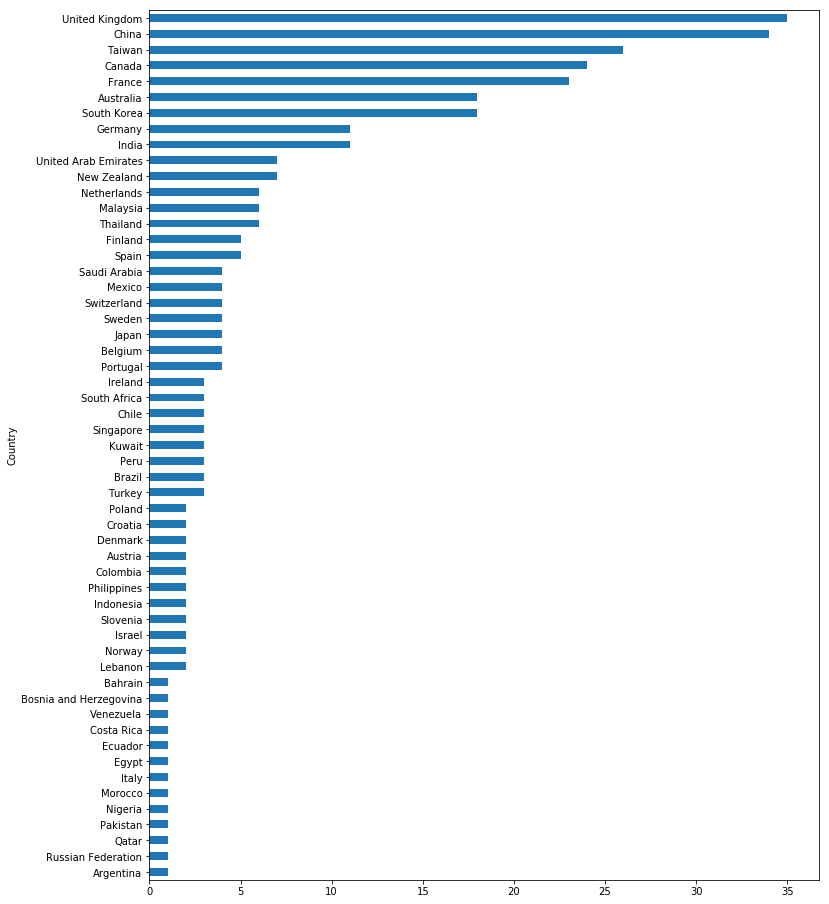

In [32]:
fig, ax = plt.subplots(figsize=(12,16))
agg.plot.barh(ax=ax)

In [33]:
agg2 = df[df["Country"] == "United States"].groupby("State")["Institution"].count().sort_values()
agg2

State
 WY     1
 VT     1
 SD     2
 PR     2
 NV     2
 NM     2
 NH     2
 ND     2
 WV     2
 ME     2
 HI     2
 AK     2
 DE     2
 ID     3
 MT     3
 IA     4
 RI     4
 AZ     4
 NE     4
 DC     4
 OR     5
 UT     6
 OK     6
 MS     6
 KS     6
 MN     7
 KY     8
 MD     9
 AR     9
 WI    10
 CT    10
 CO    10
 WA    11
 TN    11
 SC    11
 AL    13
 MO    13
 NJ    14
 IN    15
 MI    15
 LA    15
 OH    16
 VA    18
 MA    19
 IL    19
 NC    19
 FL    19
 GA    21
 PA    26
 TX    38
 CA    39
 NY    40
Name: Institution, dtype: int64

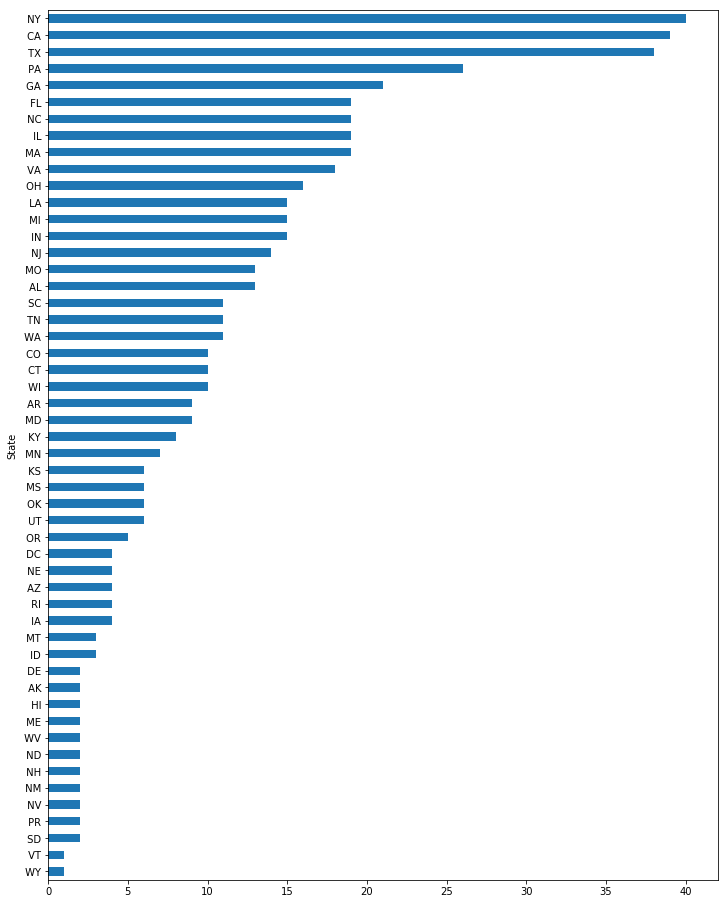

In [34]:
fig, ax = plt.subplots(figsize=(12,16))
agg2.plot.barh(ax=ax)

In [35]:
df_sc = pd.read_csv("MERGED2017_18_PP.csv", usecols=["UNITID", "INSTNM", "STABBR"])
df_sc.head()

FileNotFoundError: [Errno 2] File b'MERGED2017_18_PP.csv' does not exist: b'MERGED2017_18_PP.csv'

In [ ]:
df.shape

In [ ]:
df_us = df[df["Country"] == "United States"]
df_us.shape

In [ ]:
df_merge = pd.merge(df_us, df_sc, left_on='Institution', right_on='INSTNM', how="left")
df_merge.shape

In [ ]:
df_merge[df_merge["UNITID"].isnull()] 

In [ ]:
df.to_csv("./output/AACSB.csv")

The END